# Problem Set 4
### Alex Weinberg, Isaac Norwich, Jose Quintero
### May 5, 2022

---
# Problem 2
The goal of this problem is to explore how to approach event study designs - why two-way fixed- effect (TWFE) regressions will not get you what you want and how to do something else instead. Callaway and Sant’Anna (2020) is highly recommended reading. You may also want to look at Goodman-Bacon (2020) and/or Sun and Abraham (2020).

Note: You may notice that there exists an R package “did”, created by the authors, to imple- ment Callaway & Sant’Anna (2020). The goal of this pset is NOT for you to use this package. You will want to use the package for any real-world implementation, but here I am asking you only to estimate mean effects, never standard errors, and so you should be able to do everything by building your own code using the equations from class & consulting with the Callaway & Sant’Anna and Goodman-Bacon papers if necessary.
In this problem, you will simulate your own data. Because of this, you will know the underlying data generating process and what the “true” value of the parameters are and will be able to see how far astray TWFE can take you.
We consider a setting in which all 50 states in the U.S. implement a policy change (all units are eventually treated), but at different times. States are sorted into “treatment groups” depending on when they enacted the policy g ∈ {1986,1992,1998,2004}. Assume throughout this question that treatment is unanticipated (if you are referencing the notation of the Callaway and Sant’Anna paper, δ = 0).
Steps for data-generation:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# PARAMETERS
T = 30 # number of periods
N = 1000 # number of units
S = 50 # number of states
g_list = [1986, 1992, 1998, 2004] # treatment groups

In [3]:
# Simulate Data
i = np.arange(0,N) # vector of units
s = np.random.choice(S, N) # uniform draw from 0:S 
g = np.random.choice(g_list,S) # randomly assign states to g

In [4]:
# Create state map from state to treatment
df_treatment = pd.DataFrame({'state':np.arange(S), 'treatment':g})

print('Treatment shares')
print(df_treatment['treatment'].value_counts(normalize=True))
print('--')
print('State size')
print(df_treatment['state'].value_counts(normalize=True))



Treatment shares
1998    0.40
1986    0.28
1992    0.22
2004    0.10
Name: treatment, dtype: float64
--
State size
0     0.02
37    0.02
27    0.02
28    0.02
29    0.02
30    0.02
31    0.02
32    0.02
33    0.02
34    0.02
35    0.02
36    0.02
38    0.02
1     0.02
39    0.02
40    0.02
41    0.02
42    0.02
43    0.02
44    0.02
45    0.02
46    0.02
47    0.02
48    0.02
26    0.02
25    0.02
24    0.02
23    0.02
2     0.02
3     0.02
4     0.02
5     0.02
6     0.02
7     0.02
8     0.02
9     0.02
10    0.02
11    0.02
12    0.02
13    0.02
14    0.02
15    0.02
16    0.02
17    0.02
18    0.02
19    0.02
20    0.02
21    0.02
22    0.02
49    0.02
Name: state, dtype: float64


In [5]:
# Map units to states, treatment
df_unit = pd.DataFrame({'state':s}, index=i) # initialize data, assign states
df_unit = pd.merge(df_unit, df_treatment, on='state',how='outer',validate =  'm:1', indicator=True) # merge in treatment

assert np.all(df_unit['_merge'] == 'both') # assert merge worked

For each unit, simulate outcome data from 1980 to 2010 drawn from the following Data Generating Process:

$$
Y_{i t}=\underbrace{(2010-g)}_{\text {group intercept }}+\alpha_{i}+\alpha_{t}+\tau_{i t}+\epsilon_{i t}
$$

where
- $\alpha_{i}$ are unit fixed effects drawn randomly from $\sim N\left(\frac{\text { state }}{5}, 1\right)$
- $\alpha_{t}$ are time fixed effects generated as
$$
\alpha_{t}=0.1 *(t-g)+\epsilon^{t i m e F E}
$$
with $\epsilon^{\text {timeFE }} \sim N(0,1)$
- $\epsilon_{i t} \sim N\left(0,\left(\frac{1}{2}\right)^{2}\right)$ is an idiosyncratic error term
- $\tau_{i, t}$ are the unit-specific treatment effects at time t generated as
$$
\tau_{i t}=\underbrace{1}_{\text {instantaneous treatment effect }} \times(t-g+1) \times 1\{t \geq g\}
$$

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

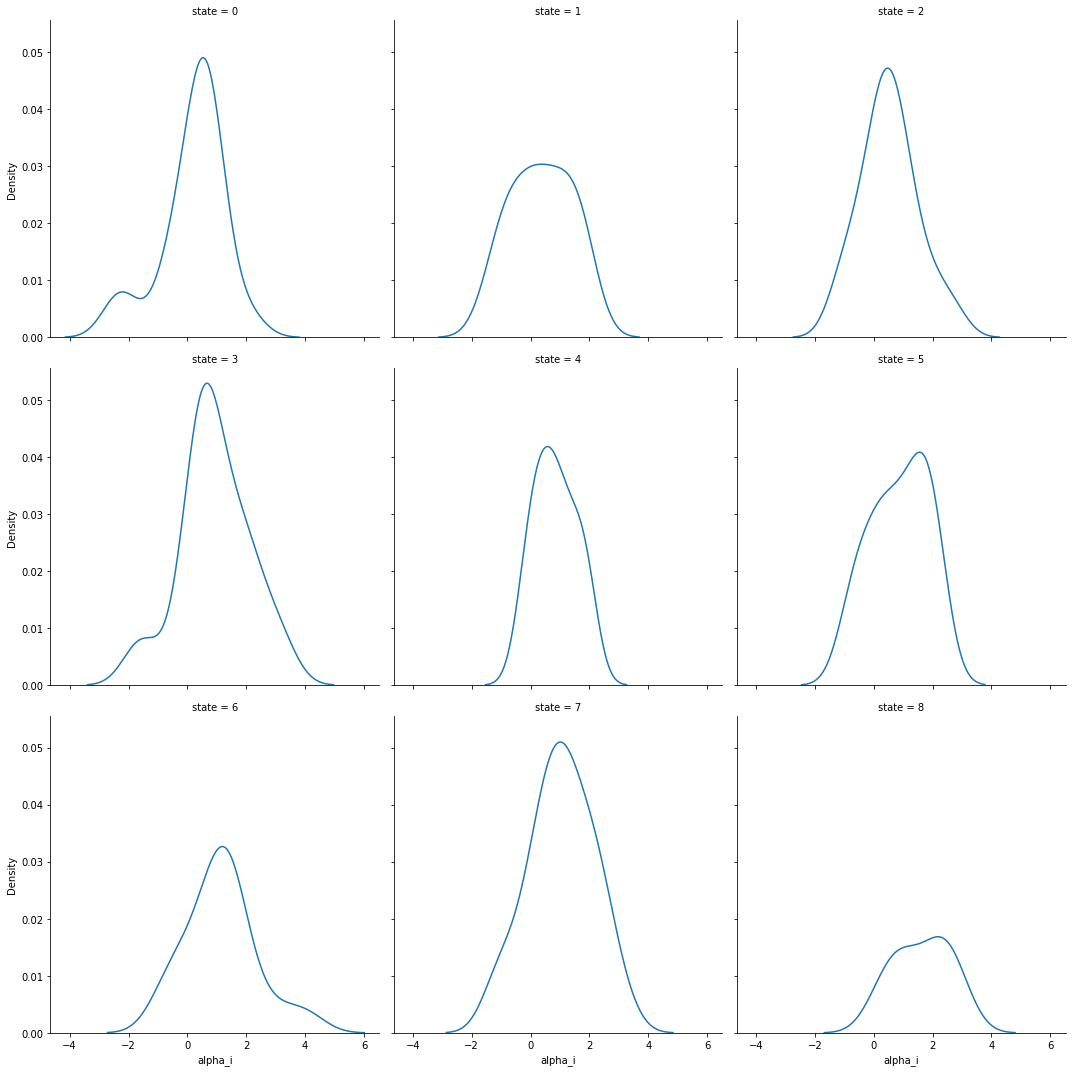

In [22]:
# INDIVIDUAL FIXED EFFECTS
df_unit['alpha_i'] = np.random.normal(df_unit.state / 5, 1) # individual FE


# # check normal distribution of individual FE by state
# # seems roughly normal centered around the state num / 5
# mask = df_unit['state'].isin(np.arange(0,9)) # states to plot
# g = sns.displot(data=df_unit[mask], 
#             x="alpha_i", 
#             col="state", 
#             col_wrap=3, 
#             kind='kde')


# TIME FIXED EFFECTS
eps_time_FE = np.random.normal(0,1,size=T)


# df_unit
# mat = np.zeros((N, T)) 

# for ii in range(N):
#     for tt in range(T):
#         mat[i,t] = (2010 - g) + alpha[i] + alpha[t] + tau[i,t] + error[i,t]

In [7]:
df_unit

,state,treatment,_merge,alpha_i
0,5,1992,both,-0.443935
1,5,1992,both,-0.181620
2,5,1992,both,1.615471
3,5,1992,both,0.722247
4,5,1992,both,1.461960
...,...,...,...,...
995,4,1992,both,0.084569
996,4,1992,both,0.311746
997,4,1992,both,-0.323352
998,4,1992,both,0.873753


In [8]:
 fdf

NameError: name 'fdf' is not defined

In [ ]:
df

In [ ]:
df_treatment